In [1]:
# Analysis 
import pandas as pd
import numpy as np
import missingno as msno

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Fill Nan Values
from sklearn.impute import SimpleImputer

#Feature Selection
from sklearn.decomposition import PCA

# Model selection and metrics
from sklearn import linear_model
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# Model Metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv"
                  )
labels=train["SalePrice"]

sampel_submission = pd.read_csv("sample_submission.csv")
print(f"train {train.shape}, test {test.shape}")

train (1460, 81), test (1459, 80)


In [3]:
data = pd.concat([train,test],ignore_index=True)
data = data.drop("SalePrice", 1)

Text(0.5, 1.0, 'Multicollinearity Plot.')

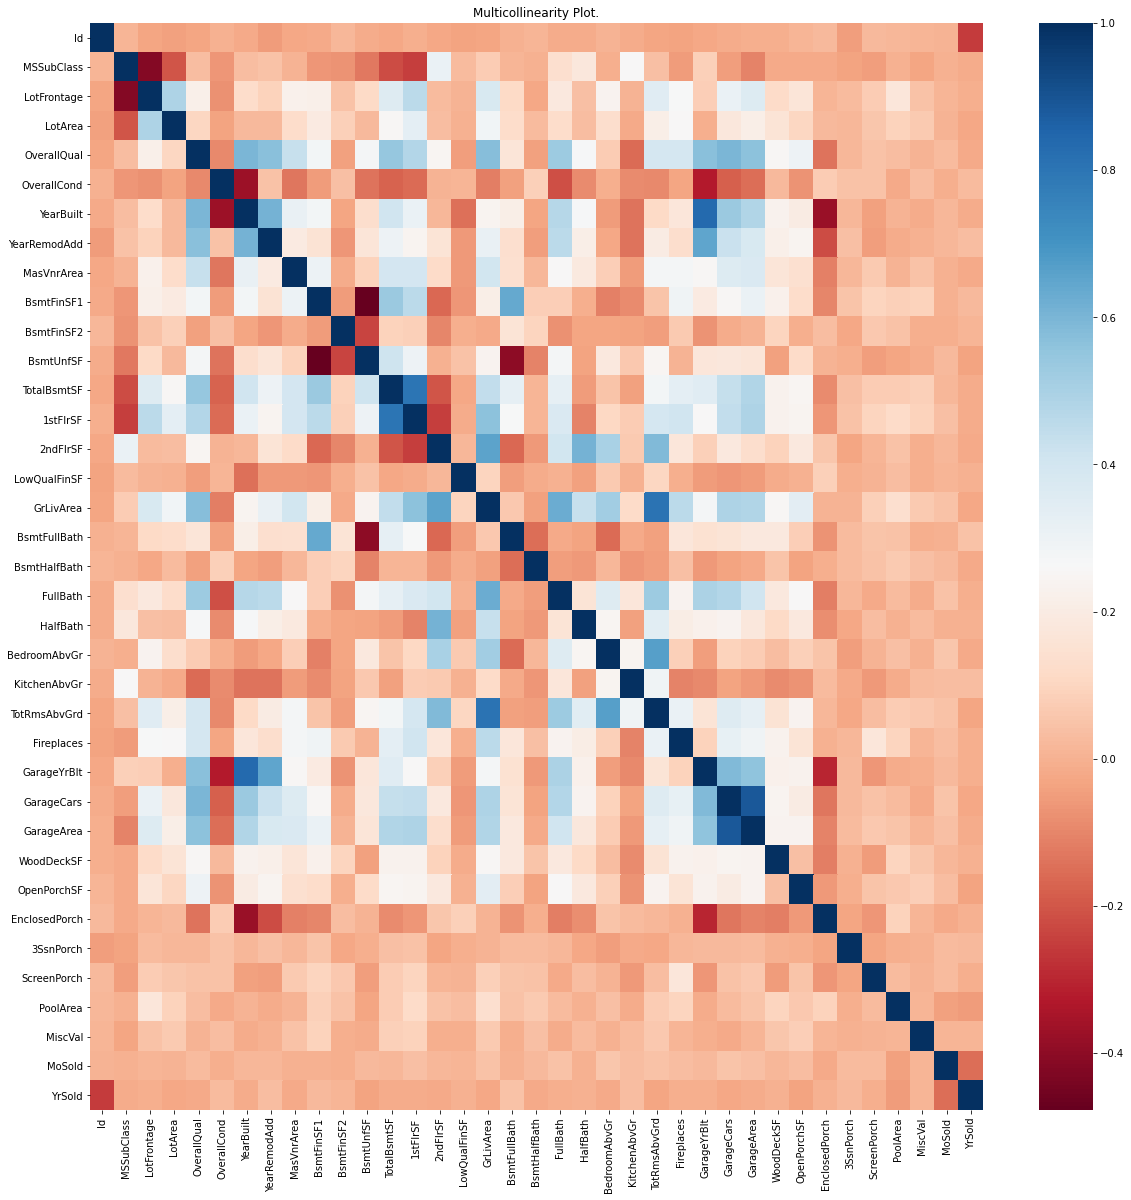

In [4]:
plt.subplots(figsize=(20,20))
sns.heatmap(data.corr(),cmap='RdBu')
plt.title("Multicollinearity Plot.")

In [5]:
data.shape

(2919, 80)

In [6]:
null_data = data.isnull().sum()
null_data[null_data>0]

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64

In [7]:
# Remove id and columns with more than a thousand missing values
data=data.drop("Id", 1)
data=data.drop("Alley", 1)
data=data.drop("Fence", 1)
data=data.drop("MiscFeature", 1)
data=data.drop("PoolQC", 1)
data=data.drop("FireplaceQu", 1)

In [8]:
# Count the column types
data.dtypes.value_counts()

object     38
int64      25
float64    11
dtype: int64

### Data Manipulation

- Apply hot encoding, convert categorical variable into dummy/indicator variables.
- Fill NaN with median for that column.
- Log transformation.
- Change -inf to 0.

In [9]:
all_columns = data.columns.values
all_columns

array(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenP

In [10]:
non_categorical =  [column for column in all_columns if data[column].dtypes != 'object']
non_categorical

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [11]:
len(non_categorical) # int: 25 , Float : 11

36

In [12]:
categorical = [column for column in all_columns if column not in non_categorical]
categorical

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [13]:
len(categorical)

38

In [14]:
# One Hot Encoding and nan transformation

data = pd.get_dummies(data)

imp = SimpleImputer(missing_values = np.nan, strategy= 'most_frequent')
data = imp.fit_transform(data)

data

array([[6.0000e+01, 6.5000e+01, 8.4500e+03, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.0000e+01, 8.0000e+01, 9.6000e+03, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [6.0000e+01, 6.8000e+01, 1.1250e+04, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       ...,
       [2.0000e+01, 1.6000e+02, 2.0000e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [8.5000e+01, 6.2000e+01, 1.0441e+04, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [6.0000e+01, 7.4000e+01, 9.6270e+03, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00]])

In [15]:
# Log transformation
data = np.log(data)

# Sales data - output data
labels = np.log(labels)
labels

# Change -inf to 0 again
data[data==-np.inf]=0

### Feature reduction
- There are many features, so I am going to use PCA to reduce them. The idea is to start with n_components = number of columns. Then select the number of components that add up to 1 variance_ratio.

In [16]:
pca = PCA(whiten=True)
pca.fit(data)

variance = pd.DataFrame(pca.explained_variance_ratio_)
np.cumsum(pca.explained_variance_ratio_)

array([0.2248857 , 0.40281429, 0.52425789, 0.62418823, 0.69580422,
       0.75944463, 0.8116806 , 0.85647038, 0.89178708, 0.92273755,
       0.94898868, 0.95842727, 0.96637545, 0.97380464, 0.97971901,
       0.98501952, 0.98918839, 0.99199181, 0.99386559, 0.99520919,
       0.99611479, 0.99695667, 0.99771023, 0.99842564, 0.9989402 ,
       0.99933882, 0.99959949, 0.99978254, 0.99988174, 0.99993998,
       0.99998599, 0.99999658, 0.99999871, 0.99999943, 0.99999999,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [17]:
pca = PCA(n_components=36,whiten=True)
pca = pca.fit(data)
dataPCA = pca.transform(data)

### Data Model Selection
- Simple test to run multiple models against our data. First, with raw features. No PCA.

In [18]:
# Split traing and test
train = data[:1460]
test = data[1460:]

In [19]:
def lets_try(train,labels):
    results={}
    
    def test_model(clf):
        
        cv = KFold(n_splits=5,shuffle=True,random_state=45)
        r2 = make_scorer(r2_score)
        r2_val_score = cross_val_score(clf, train, labels, cv=cv,scoring=r2)
        scores=[r2_val_score.mean()]
        return scores
    
    
    clf = linear_model.LinearRegression()
    results["Linear"]=test_model(clf)
    
    clf = linear_model.Ridge()
    results["Ridge"]=test_model(clf)
    
    clf = linear_model.BayesianRidge()
    results["Bayesian Ridge"]=test_model(clf)
    
    clf = linear_model.HuberRegressor()
    results["Hubber"]=test_model(clf)
    
    clf = linear_model.Lasso(alpha=1e-4)
    results["Lasso"]=test_model(clf)
    
    clf = BaggingRegressor()
    results["Bagging"]=test_model(clf)
    
    clf = RandomForestRegressor()
    results["RandomForest"]=test_model(clf)
    
    clf = AdaBoostRegressor()
    results["AdaBoost"]=test_model(clf)
    
    clf = svm.SVR()
    results["SVM RBF"]=test_model(clf)
    
    clf = svm.SVR(kernel="linear")
    results["SVM Linear"]=test_model(clf)
    
    
    
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["R Square Score"] 
    
    results=results.sort_values(by=["R Square Score"],ascending=False)
    results.plot(kind="bar",title="Model Scores")
    
    axes = plt.gca()
    axes.set_ylim([0.5,1])
    
    return results


,R Square Score
RandomForest,0.862971
Lasso,0.853935
Linear,0.853790
Bayesian Ridge,0.852443
SVM Linear,0.849076
Bagging,0.843803
Ridge,0.838624
Hubber,0.836259
AdaBoost,0.800908
SVM RBF,0.789166


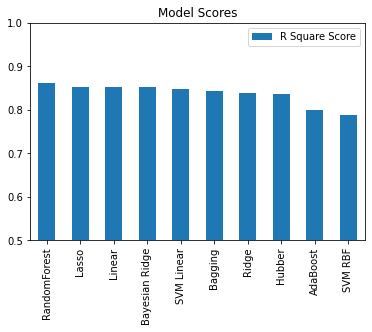

In [20]:
lets_try(train,labels)

### Now, let's try the same but using data with PCA applied.

,R Square Score
Hubber,0.859652
SVM Linear,0.858325
Bayesian Ridge,0.853913
Lasso,0.853862
Ridge,0.853826
Linear,0.853790
SVM RBF,0.792183
RandomForest,0.750635
Bagging,0.730536
AdaBoost,0.668813


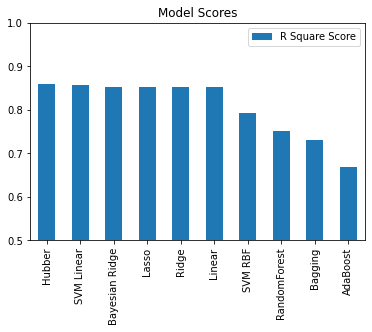

In [21]:
# Split traing and test
train = dataPCA[:1460]
test = dataPCA[1460:]

lets_try(train,labels)